Candidate 'Alice' added successfully.
Candidate 'Bob' added successfully.
Candidate 'Charlie' added successfully.
Voter 'Voter1' added successfully.
Voter 'Voter2' added successfully.
Voter 'Voter3' added successfully.
Voting has started!
Voter 'Voter1' voted for 'Alice'. Vote recorded with hash: 4289baf60353acefbc2e98ea04f7d7a7606672dc3fc72b10d9668632d73f1965
Voter 'Voter2' voted for 'Bob'. Vote recorded with hash: 99b0ada46a49bc1a7d5bba685cc96fb6350a4c3b3ee392a95465a1ab146f1b72
Voter 'Voter3' voted for 'Alice'. Vote recorded with hash: 71e225acf5c93bdcca15d5ffc1e2a10af02004b135934f4c0ad423b1a80a37ab
Voter 'Voter1' has already voted.
Voting has ended!

Voting Results:
Alice: 2 votes
Bob: 1 votes
Charlie: 0 votes

Winner: Alice with 2 votes!


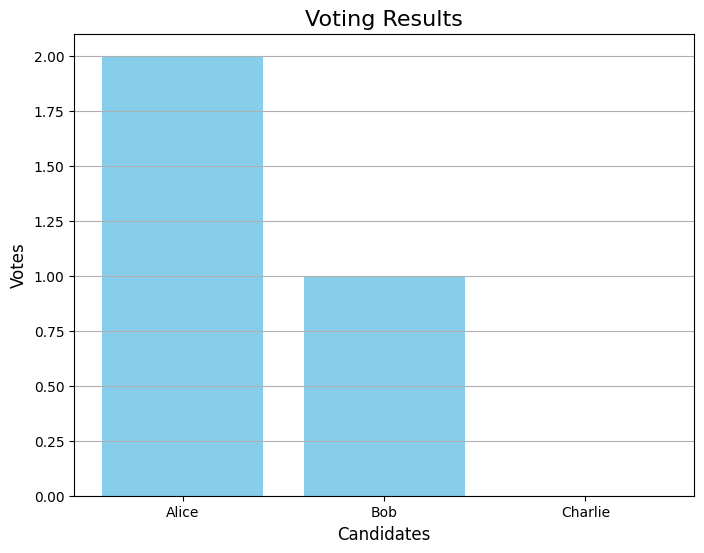

Data saved to voting_data.json.
Data loaded from voting_data.json.


In [4]:
import json
import hashlib
import matplotlib.pyplot as plt
from datetime import datetime

class DecentralizedVotingSystem:
    def __init__(self):
        self.candidates = {}  # Dictionary to store candidates and their votes
        self.voters = {}  # Dictionary to track voter status
        self.blockchain = []  # List to simulate blockchain
        self.voting_open = False

    def add_candidate(self, candidate_name):
        if candidate_name not in self.candidates:
            self.candidates[candidate_name] = 0
            print(f"Candidate '{candidate_name}' added successfully.")
        else:
            print(f"Candidate '{candidate_name}' already exists.")

    def add_voter(self, voter_id):
        if voter_id not in self.voters:
            self.voters[voter_id] = False
            print(f"Voter '{voter_id}' added successfully.")
        else:
            print(f"Voter '{voter_id}' already exists.")

    def start_voting(self):
        if not self.voting_open:
            self.voting_open = True
            print("Voting has started!")
        else:
            print("Voting is already open.")

    def end_voting(self):
        if self.voting_open:
            self.voting_open = False
            print("Voting has ended!")
        else:
            print("Voting is already closed.")

    def vote(self, voter_id, candidate_name):
        if not self.voting_open:
            print("Voting is not currently open. Please wait for it to start.")
            return

        if voter_id not in self.voters:
            print(f"Voter '{voter_id}' is not registered.")
            return

        if self.voters[voter_id]:
            print(f"Voter '{voter_id}' has already voted.")
            return

        if candidate_name not in self.candidates:
            print(f"Candidate '{candidate_name}' does not exist. Please vote for a valid candidate.")
            return

        # Record the vote
        self.candidates[candidate_name] += 1
        self.voters[voter_id] = True

        # Add vote to blockchain
        vote_data = f"{voter_id}:{candidate_name}:{datetime.now()}"
        vote_hash = hashlib.sha256(vote_data.encode()).hexdigest()
        self.blockchain.append(vote_hash)

        print(f"Voter '{voter_id}' voted for '{candidate_name}'. Vote recorded with hash: {vote_hash}")

    def save_data(self, file_name):
        data = {
            "candidates": self.candidates,
            "voters": self.voters,
            "blockchain": self.blockchain
        }
        with open(file_name, "w") as file:
            json.dump(data, file, indent=4)
        print(f"Data saved to {file_name}.")

    def load_data(self, file_name):
        with open(file_name, "r") as file:
            data = json.load(file)
            self.candidates = data["candidates"]
            self.voters = data["voters"]
            self.blockchain = data["blockchain"]
        print(f"Data loaded from {file_name}.")

    def get_results(self):
        if self.voting_open:
            print("Voting is still ongoing. Please wait until it ends to view results.")
            return

        print("\nVoting Results:")
        for candidate, votes in self.candidates.items():
            print(f"{candidate}: {votes} votes")

        winner = max(self.candidates, key=self.candidates.get)
        print(f"\nWinner: {winner} with {self.candidates[winner]} votes!")

    def plot_results(self):
        if not self.candidates:
            print("No candidates to display.")
            return

        candidates = list(self.candidates.keys())
        votes = list(self.candidates.values())

        plt.figure(figsize=(8, 6))
        plt.bar(candidates, votes, color='skyblue')
        plt.title("Voting Results", fontsize=16)
        plt.xlabel("Candidates", fontsize=12)
        plt.ylabel("Votes", fontsize=12)
        plt.grid(axis='y')
        plt.show()


# Example Usage in Google Colab
voting_system = DecentralizedVotingSystem()

# Add candidates
voting_system.add_candidate("Alice")
voting_system.add_candidate("Bob")
voting_system.add_candidate("Charlie")

# Add voters
voting_system.add_voter("Voter1")
voting_system.add_voter("Voter2")
voting_system.add_voter("Voter3")

# Start voting
voting_system.start_voting()

# Cast votes
voting_system.vote("Voter1", "Alice")
voting_system.vote("Voter2", "Bob")
voting_system.vote("Voter3", "Alice")
voting_system.vote("Voter1", "Charlie")  # Duplicate vote, should be blocked

# End voting
voting_system.end_voting()

# Show results
voting_system.get_results()

# Plot results
voting_system.plot_results()

# Save and Load Data
voting_system.save_data("voting_data.json")
voting_system.load_data("voting_data.json")
